# Chapter 10

시계열에서 딥러닝 모델을 활용했을 때의 장점
+ 정상성을 요구하지 않는다.
+ 계절형 ARIMA 모델의 차수, 계절성에 따른 평가와 같은 파라미터를 고르는 기술을 개발할 필요가 없다.
+ 상태 공간 모델링에서 유용했던 시스템의 역동성에 대한 가설을 세울 필요가 없다. 
----
머신러닝과 비교했을 때, 딥러닝의 우월성
+ 머신러닝 알고리즘은 입력 데이터와 차원성 측면에서 불안정한 경향이 있다. 반면 딥러닝은 모델과 입력의 특성에 관해서는 유용하다.
+ 머신러닝 기법으로 이종(이질적인? 다양한 종류의?) 데이터를 다루기 어렵지만, 딥러닝은 많이 다룬다.
+ 시간 데이터에 특화된 구조의 개발이 가능하다. 
+ 비선형을 정확히 표현할 수 있다. 

### 10.1 신경망 구조 이해 

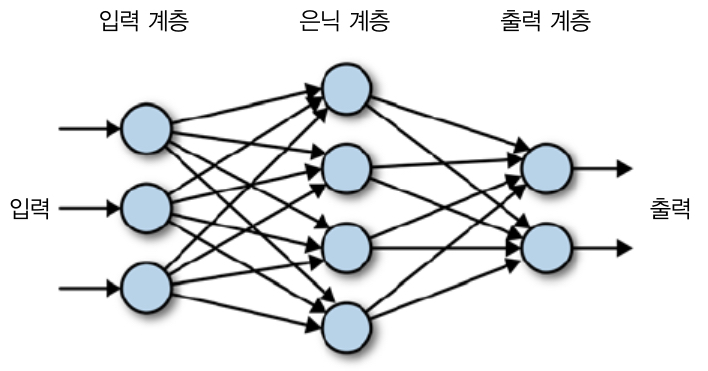

In [16]:
from IPython.display import Image
Image("IMG_583BC191C564-1.jpeg")

1. 입력 벡터 (X1)는 3개의 원소를 가진다. 입력 계층과 은닉 계층 사이의 가중치(W1)은 4 x 3 행렬이다. 따라서 은닉 계층의 4개 원소는 X1 x W1 으로 구할 수 있다. 이 계산의 결과는 4 x 1 벡터임. 

2. 활성함수로 비선형성을 적용한다.(ex) 탄젠트, 시그모이드) 또한, 평향 B1을 활성함수 내에 적용하면, 은닉 계층의 출력은 다음과 같다. \
H = a(W1 x X1 + B1)

3. 출력 계층의 원소는 2개이므로, 4차원 은닉 계층의 출력을 2개의 출력으로 변환해줘야 한다. 분류 문제의 경우, softmax 활성함수가 적용되지만, 비선형 활성함수를 포함하지 않는 것이 보통이다. 단순히 두 개의 숫자만을 예측한다고 가정하면, 은닉 계층의 4개 출력을 결합하기 위한 덴스 계층을 적용하면 된다. 덴스 계층은 4개의 입력을 2개의 출력이 되도록 결합해주는 것으로, 이 둘 사이에는 W2라는 2 x 4 행렬이 필요하다. \
Y = W2 x H 

### 10.2 신경망 프로그래밍

기호형 프로그래밍 -> 모든 관계를 미리 정의하고, 선언 당시에는 계산을 하지 않음. \
명령형 프로그래밍 -> 이미 작성된 코드를 열 단위로 계산. 

+ 기호 프로그래밍에서는 계산의 수행 방법, 시기를 사용자가 정하지 않고, 프레임워크가 최적화할 수 있는 여지로 남겨두기 때문에 효율적이다. 
+ 명령형 프로그래밍은 계산의 흐름을 이해하고 디버깅하는 것이 더 쉽다. 
+ 텐서플로, MXNet은 기호 프로그래밍, 토치는 명령형 프로그래밍

딥러닝 프레임워크 : 모든 구조는 개별 요소와 그들 간의 관계로 설명될 수 있어야 함
기호와 데이터의 관계 때문에 모든 프레임 워크는 기호와 데이터를 반드시 구별해야 함

앞의 완전연결계층을 행렬 연산, 활성함수, 편향을 모두 고려하면 다음과 같이 표현 \
layer L = tanh(A x B  + bias)   \
여러 계층을 서로 연결해 다음 계층으로 연결할 수도 있다 \
layer L1 = tanh(A x B + bias1) \ 
layer L2 = tanh(L1 x D + bias2)

이러한 기호, 연산, 계층들의 복합체는 하나의 그래프를 결과로 만들어낸다. 그래프는 기호와 기호 사이의 의존성, 그 의존 방법을 정확하게 구별하는데 사용됨 \
→ 경사도를 계산하는 경사 하강 과정 중 학습 단계마다 일어나는 가중치 조정에 필수


신경망은 일종의 확률적 경사 하강법을 통해 한 번에 전체 데이터의 일부분에 접근하는 걸 반복해 전체 데이터를 학습하므로 이런 방식의 학습을 위한 데이터 기반이 마련되어야 함 

경사 하강법 설명 : https://gooopy.tistory.com/69

NC 데이터, NCT 데이터 이해

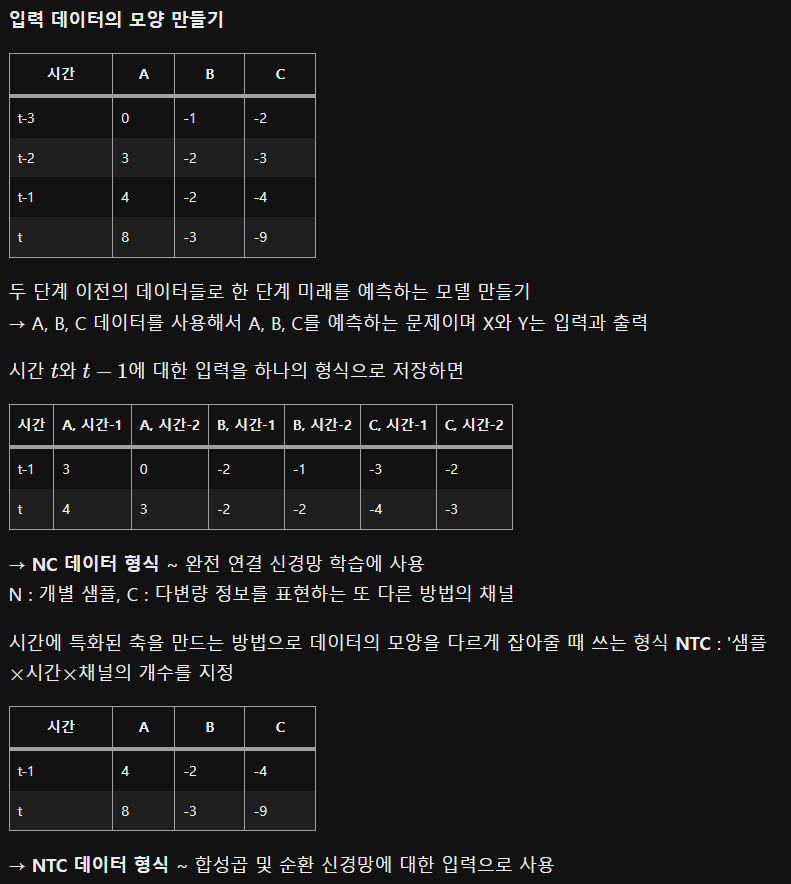

In [13]:
Image("nc.png")

### 10.3 순전파 네트워크

https://m.blog.naver.com/koreadeep/222600824716

##### 순전파 네트워크의 장점
+ 순전파 네트워크는 병렬화될 수 있어서 성능이 좋다.
+ 연속된 사건들에서 역동적이며 복잡한 시간축의 존재를 검사하는 데 좋다.
+ 순전파 네트워크의 구성요소는 더 크고 복잡한 시계열 딥러닝 구조에 통합되는 경우가 많다.


##### 어텐션 기법

https://glee1228.tistory.com/3

어텐션 기법으로 순전파 신경망이 시간을 인지하도록 만들기 \
어텐션 기법 : 입력되는 순서의 어떤 부분이 원하는 출력에 연관되는지 배울 수 있게 해줌. \
어떤 정보가 언제 중요한지는 시간 단계마다 학습되는 어텐션 가중치에 의해 수행된다. \
→ 모델의 출력이나 이전 단계의 은닉 상태를 곱해서 은닉 상태를 콘텍스트 벡터로 변환

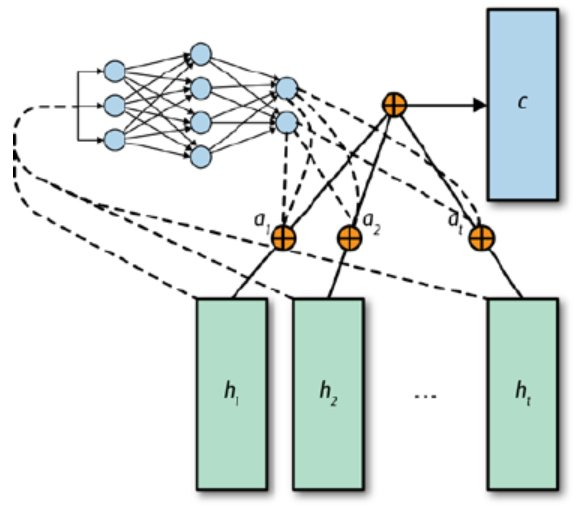

In [12]:
Image("attention.jpeg")

각 시간 단계에 개별적으로 적용되어 시간 단계마다 은닉 상태 h1, ... , hr을 생성한다. \
그림 가장자리의 신경망은 a(ht)를 학습하기 위한 것으로, 어텐션 메커니즘이 적용된다. 

어텐션 메커니즘은 네트워크가 다른 시간대의 데이터에서 들어오는 상태 정보인 각 입력에 얼마나 가중치를 줄 것인지 학습할 수 있도록 해준다. → 입력들의 최종 합을 계산할 때 어느 시간 단계에 더 가중치를 주는지 또는 덜 가중치를 주는지를 결정할 수 있도록 해준다. 

서로 다른 시간에 대한 은닉 상태들은 마지막의 타깃/레이블에 대한 생성 과정을 그들의 어텐션 계수와 결합한다. 

### 10.4 합성곱 신경망

https://m.blog.naver.com/bsh1004664/222666228508

그러나 전통적인 합성곱은 시계열에 잘 맞아 들어가지 않는다. 합성곱의 주요 특징은 모든 공간이 균등하게 취급된다는 것인데, 어떤 시점의 데이터가 다른 시점보다 필연적으로 더 가까운 시계열에는 적합하지 않다. 

##### 인과적 합성곱
시간의 의미와 인과관계를 만들기 위해 변형된 합성곱. 

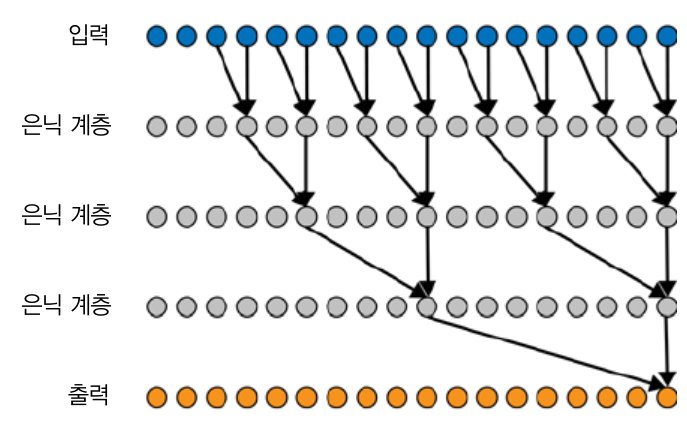

In [15]:
Image("convol2.jpeg")

팽창된 인과적 합성곱 : 시간상 이른 시점의 데이터만 합성곱 필터로 들어간다. 이른 시점이 나중 시점에 적용되는 합성곱으로 들어간다. 이전 시점의 데이터만 허용하여 시간의 인과관계 개념을 도입한다. 

팽창? 합성곱 필터의 배열에서 어떤 지점이 생략된다. 즉, 각 계층의 수준에서 어떤 한 시점의 데이터는 하나의 합성곱 필터에만 들어간다.



### 10.5 RNN


https://wikidocs.net/22886

RNN과 순전파 신경망의 차이점
+ RNN은 한 번에 한 시간 단계를 차례대로 관찰
+ RNN은 한 시간 단계에서 다음 단계로 상태를 저장
+ RNN에는 은닉 상태를 포함한 시간 단계 간의 상태를 갱신하기 위한 파라미터가 있다

RNN의 단점을 보완한 GRU, LSTM : https://velog.io/@nkw011/lstm-gru

seq2seq : https://bkshin.tistory.com/entry/NLP-13-%EC%8B%9C%ED%80%80%EC%8A%A4%ED%88%AC%EC%8B%9C%ED%80%80%EC%8A%A4seq2seq

### 10.6 복합 구조

변형된 LSTNet : AR 모델과 병렬적으로 기본적인 순환 계층 및 스킵 순환 계층의 출력을 합한 것 \
→ 각 순환 계층에 주입된 입력은 시간과 채널의 축 모두에 대해 합성곱 연산을 수행한 합성곱 계층의 출력

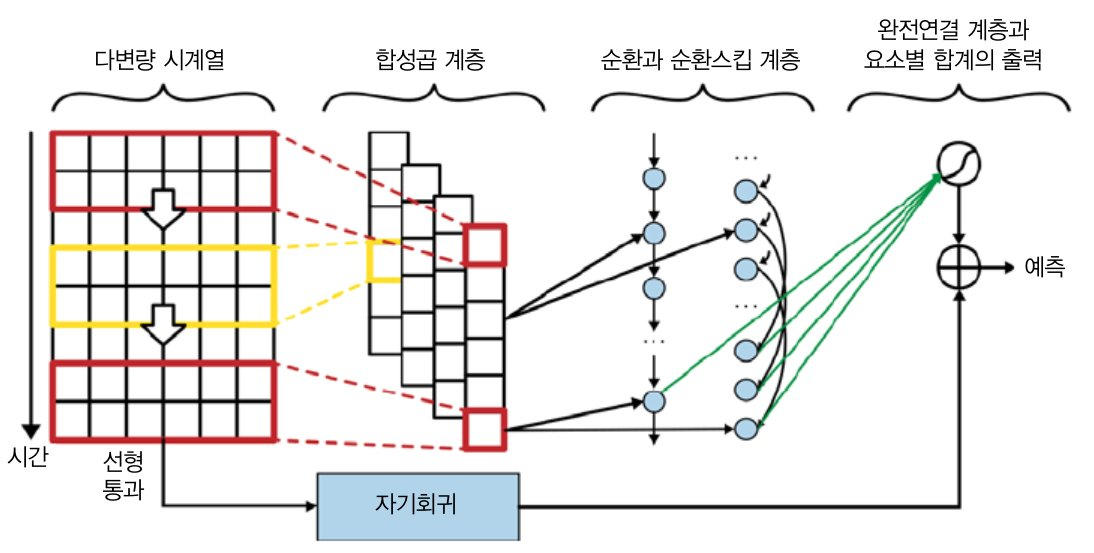

In [17]:
Image("complex.jpeg")

스킵 순환 계층? 모델이 데이터가 보유한 주기성에 집중할 수 있도록 조정한 계층 
